## 2. Stability of Trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [43]:
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000, wrap=True):
    m, g, w = params
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    if wrap:
        solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]
    
    return solution

In [44]:
def calc_eigenvalues(g, u_1):
    if  isinstance(u_1 ,(int,float)):
        term = np.sqrt(np.complex(g**2 - np.cos(u_1)))
        sig_1 = -g + np.real(term)
        sig_2 = -g - np.real(term)

        return sig_1, sig_2
    
    else:
        out_1 = []
        out_2 = []
        for u in u_1.astype(complex):
            term = np.sqrt(g**2 - np.cos(u))
            sig_1 = -g + np.real(term)
            sig_2 = -g - np.real(term)
            out_1.append(sig_1)
            out_2.append(sig_2)

        return out_1, out_2

def calc_eigenvectors(g, u_1):
    term = np.real(np.sqrt(np.complex(g**2 - np.cos(u_1))))
    e_1 = [-g - term, np.cos(u_1)]
    e_2 = [-g + term, np.cos(u_1)]

    return e_1, e_2


### a)

#### i) periodic regime

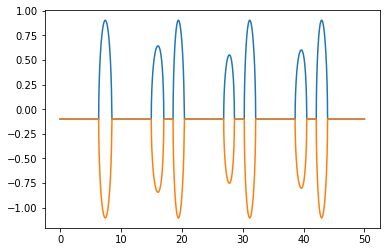

In [38]:
m, g, w = .91, .1, .8

simulation = sim_pendulum((m, g, w), t_stop=50)

plt.plot(simulation.t, calc_eigenvalues(g, simulation.y[0])[0])
plt.plot(simulation.t, calc_eigenvalues(g, simulation.y[0])[1])

#### ii) chaotic regime

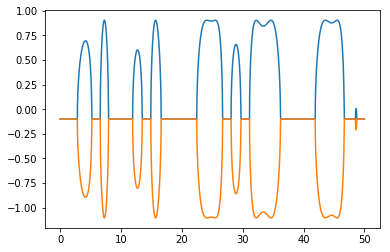

In [39]:
m, g, w = 1.15, .1, .8

simulation = sim_pendulum((m, g, w), t_stop=50)

plt.plot(simulation.t, calc_eigenvalues(g, simulation.y[0])[0])
plt.plot(simulation.t, calc_eigenvalues(g, simulation.y[0])[1])

### b)

#### i) stable

[0.8310686083038926, -0.8568887533689473]
[2.6000000008310686, -8.568887533689473e-10, 0]


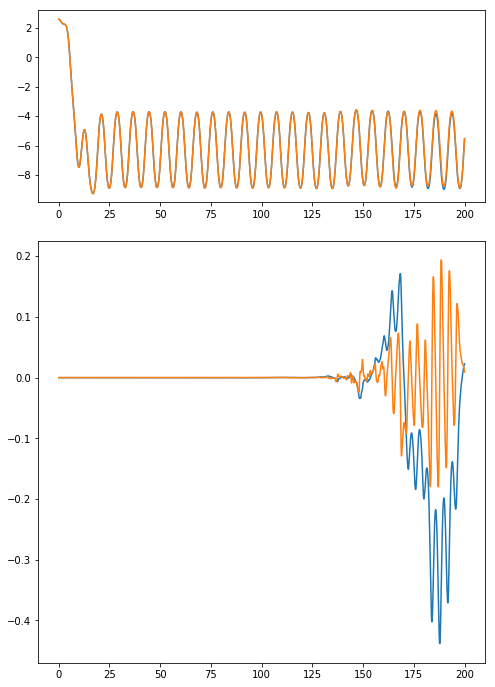

In [115]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[1]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]
print(ev)
print(perp)

simulation_a = sim_pendulum((m, g, w), t_stop=200, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=200, u0=u0, wrap=False)

diff = (simulation_a.y - simulation_b.y)

pos = np.where(np.abs(np.diff(simulation_a.y[0])) >= .5 )[0]+1
simulation_a.y = [np.insert(simulation_a.y[0], pos, np.nan), 
              np.insert(simulation_a.y[1], pos, np.nan), 
              np.insert(simulation_a.y[2], pos, np.nan)]

pos = np.where(np.abs(np.diff(simulation_b.y[0])) >= .5 )[0]+1
simulation_b.y = [np.insert(simulation_b.y[0], pos, np.nan), 
              np.insert(simulation_b.y[1], pos, np.nan), 
              np.insert(simulation_b.y[2], pos, np.nan)]

fig = plt.figure()
ax1 = plt.subplot2grid((3, 1), (0, 0))
ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

ax1.plot(simulation_a.y[2], simulation_a.y[0])
ax1.plot(simulation_b.y[2], simulation_b.y[0])

ax2.plot(simulation_a.t, diff[0])
ax2.plot(simulation_a.t, diff[1])

fig.set_size_inches(8, 12)
plt.show()

#### ii) unstable

[-1.0310686083038927, -0.8568887533689473]
[2.5999999989689315, -8.568887533689473e-10, 0]


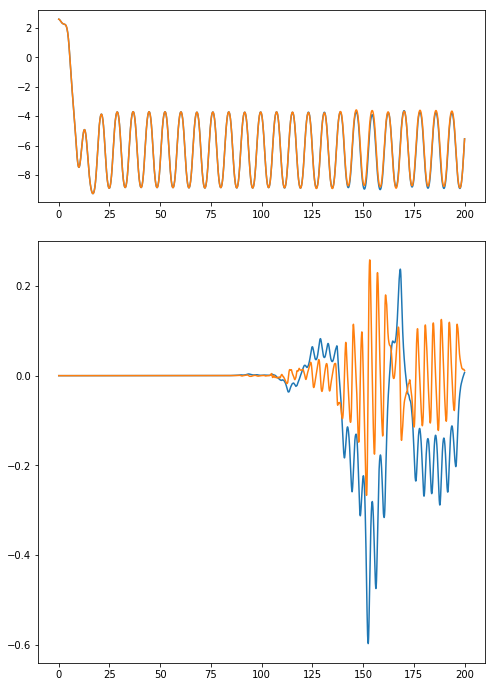

In [114]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[0]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]
print(ev)
print(perp)

simulation_a = sim_pendulum((m, g, w), t_stop=200, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=200, u0=u0, wrap=False)

diff = simulation_a.y - simulation_b.y

pos = np.where(np.abs(np.diff(simulation_a.y[0])) >= .5 )[0]+1
simulation_a.y = [np.insert(simulation_a.y[0], pos, np.nan), 
              np.insert(simulation_a.y[1], pos, np.nan), 
              np.insert(simulation_a.y[2], pos, np.nan)]

pos = np.where(np.abs(np.diff(simulation_b.y[0])) >= .5 )[0]+1
simulation_b.y = [np.insert(simulation_b.y[0], pos, np.nan), 
              np.insert(simulation_b.y[1], pos, np.nan), 
              np.insert(simulation_b.y[2], pos, np.nan)]

fig = plt.figure()
ax1 = plt.subplot2grid((3, 1), (0, 0))
ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

ax1.plot(simulation_a.y[2], simulation_a.y[0])
ax1.plot(simulation_b.y[2], simulation_b.y[0])

ax2.plot(simulation_a.t, diff[0])
ax2.plot(simulation_a.t, diff[1])

fig.set_size_inches(8, 12)
plt.show()

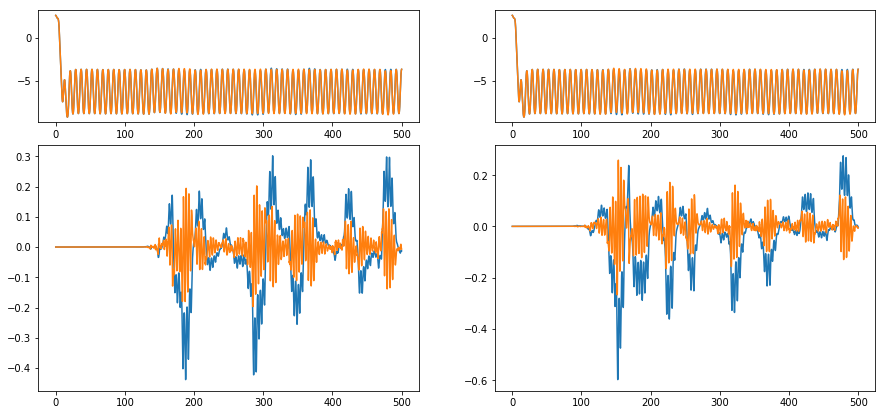

In [126]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[1]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]

simulation_a = sim_pendulum((m, g, w), t_stop=500, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=500, u0=u0, wrap=False)

diff = (simulation_a.y - simulation_b.y)

fig = plt.figure()
ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (1, 0), rowspan=2)

ax1.plot(simulation_a.y[2], simulation_a.y[0])
ax1.plot(simulation_b.y[2], simulation_b.y[0])

ax2.plot(simulation_a.t, diff[0])
ax2.plot(simulation_a.t, diff[1])

m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[0]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]

simulation_a = sim_pendulum((m, g, w), t_stop=500, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=500, u0=u0, wrap=False)

diff = simulation_a.y - simulation_b.y

ax3 = plt.subplot2grid((3, 2), (0, 1))
ax4 = plt.subplot2grid((3, 2), (1, 1), rowspan=2)

ax3.plot(simulation_a.y[2], simulation_a.y[0])
ax3.plot(simulation_b.y[2], simulation_b.y[0])

ax4.plot(simulation_a.t, diff[0])
ax4.plot(simulation_a.t, diff[1])

fig.set_size_inches(15, 7)
plt.show()